# Problem 1

### Task a.

        head data/npf_train.csv -n 1

"id","date","class4","partlybad","CO2168.mean",
"CO2168.std","CO2336.mean","CO2336.std","CO242.mean",
"CO242.std","CO2504.mean","CO2504.std","Glob.mean",
"Glob.std","H2O168.mean","H2O168.std","H2O336.mean",
"H2O336.std","H2O42.mean","H2O42.std","H2O504.mean",
"H2O504.std","H2O672.mean","H2O672.std","H2O84.mean",
"H2O84.std","NET.mean","NET.std","NO168.mean",
"NO168.std","NO336.mean","NO336.std","NO42.mean",
"NO42.std","NO504.mean","NO504.std","NO672.mean",
"NO672.std","NO84.mean","NO84.std","NOx168.mean",
"NOx168.std","NOx336.mean","NOx336.std","NOx42.mean",
"NOx42.std","NOx504.mean","NOx504.std","NOx672.mean",
"NOx672.std","NOx84.mean","NOx84.std","O3168.mean",
"O3168.std","O342.mean","O342.std","O3504.mean",
"O3504.std","O3672.mean","O3672.std","O384.mean",
"O384.std","Pamb0.mean","Pamb0.std","PAR.mean",
"PAR.std","PTG.mean","PTG.std","RGlob.mean",
"RGlob.std","RHIRGA168.mean","RHIRGA168.std",
"RHIRGA336.mean","RHIRGA336.std","RHIRGA42.mean",
"RHIRGA42.std","RHIRGA504.mean","RHIRGA504.std",
"RHIRGA672.mean","RHIRGA672.std","RHIRGA84.mean",
"RHIRGA84.std","RPAR.mean","RPAR.std","SO2168.mean",
"SO2168.std","SWS.mean","SWS.std","T168.mean",
"T168.std","T42.mean","T42.std","T504.mean",
"T504.std","T672.mean","T672.std","T84.mean","T84.std",
"UV_A.mean","UV_A.std","UV_B.mean","UV_B.std",
"CS.mean","CS.std"
        
        tail data/npf_train.csv -n 1

430,"2009-11-19","nonevent",FALSE,401.640476190476,
2.05221157540603,400.852096774194,2.88418249183689,
402.276031746032,2.13837181027435,399.988095238095,
3.76684982494485,23.9736363636364,15.8734590282841,
7.28206349206349,0.124475139766409,7.25596774193548,
0.109056455186148,7.27666666666667,0.18617542889055,
7.23428571428571,0.0897975192867042,7.26444444444445
,0.0802169996016408,7.28095238095238,0.156583629986418,
25.7895541401274,20.438398262043,0.0758823529411765,
0.0988174148365461,0.0776119402985074,0.12013993800462,
0.0558823529411765,0.0713669369101216,0.0763235294117647,
0.0959773669178919,0.0797058823529412,0.107578095038189,
0.0560294117647059,0.0758462644990166,2.46455882352941,
0.992694860488553,2.36313432835821,0.949306300084154,
2.49058823529412,1.03198675560306,2.30823529411765,
1.03703213320654,2.31794117647059,0.995823455586934,
2.46676470588235,0.992201594189332,15.5861764705882,
1.57937549476619,14.0522058823529,1.31908136916278,
18.34,4.00715256033397,18.8229411764706,4.34763928353902,
15.0026470588235,1.30688260460916,982.155454545455,
1.30986207195992,50.7870270270271,32.3897675452028,
0.00764127764127762,0.00971713566115077,4.94985257985258,
2.81866430266539,93.0526984126984,0.459284880141364,
93.1853225806451,1.06782100443592,92.8625396825397,
0.672007028222581,92.6023809523809,1.66303716937659,
93.3009523809524,2.63751209401644,92.7147619047619,
0.494713527866767,4.36813267813267,3.95910691179253,
0.0432352941176471,0.0832267389666127,907.428571428571,
0.503952630678976,3.22982800982801,0.263631740282639,
3.25955773955774,0.39944456631604,3.1902457002457,
0.131050844023041,3.13120393120393,0.248497505085603,
3.28734643734643,0.327367218795209,1.97837346437346,
1.10772706890985,0.0501312039312039,0.0308892162265223,
0.00256910731707317,0.00507759328005849


### Task b.

        wc data/npf_train.csv -l

431 data/npf_train.csv 

In [1]:
%matplotlib inline

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import PolynomialFeatures

# Problem 5

## Task a

In [49]:
def f(x):
    y = 1 + x - x**2/x
    return y

def get_y(x):
    e = np.random.normal(0, 0.4, len(x))
    y = np.array([])

    for i in range(len(x)):
        y = np.append(y, f(x[i]) + e[i])

    return y

In [106]:
x_train = np.sort(np.random.uniform(-3, 3, 20))
y_train = get_y(x_train)

x_valid = np.sort(np.random.uniform(-3, 3, 20))
y_valid = get_y(x_valid)

x_test = np.sort(np.random.uniform(-3, 3, 1000))
y_test = get_y(x_test)


## Task b

In [156]:
def plot(model, x, y):
    predict = np.poly1d(model)
    y_pred = predict(x)

    mse = round(((y - y_pred)**2).mean(), 5)

    plt.figure()
    plt.title(f"polynomial degree = {k - 1}, MSE = {mse}")
    plt.xlim(-3,3)
    plt.scatter(x, y)
    plt.plot(x, y_pred, "r")


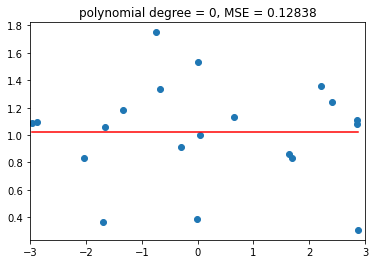

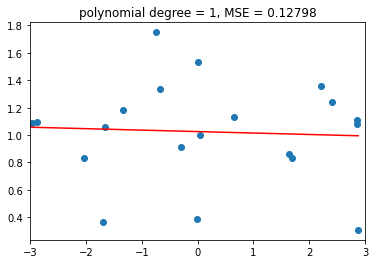

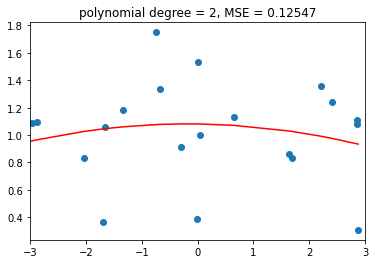

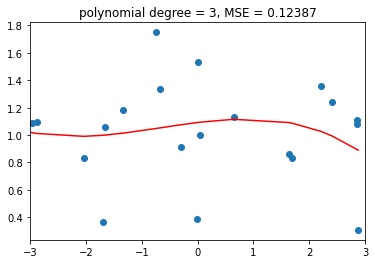

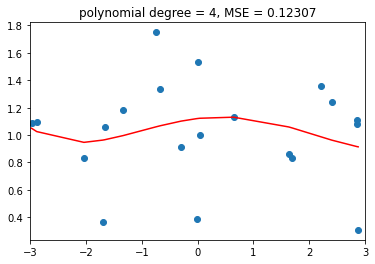

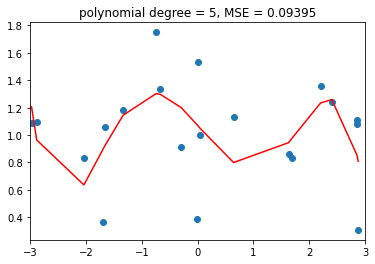

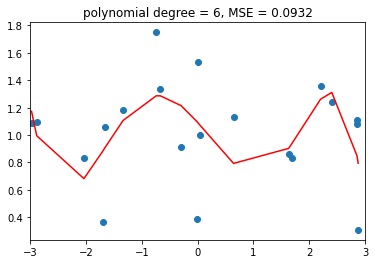

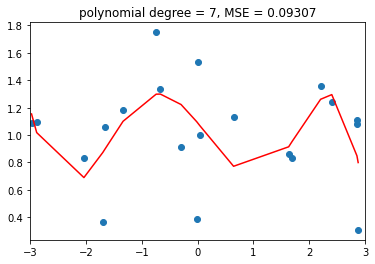

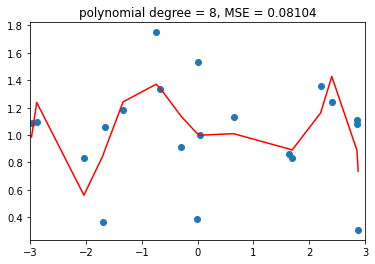

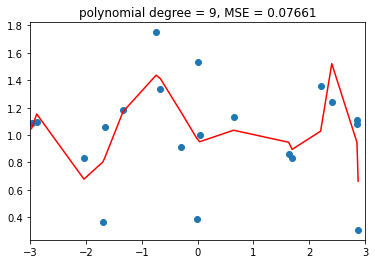

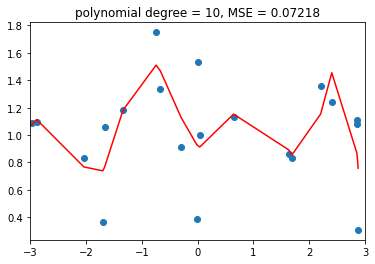

In [157]:
models = []

for k in range(1,12):
    model = np.polyfit(x_train, y_train, k-1)
    models.append(model)
    
    plot(model, x_train, y_train)

plt.show()

Mean squared error improves as the polynomial degree increases and the fit gets more flexible.

## Task c

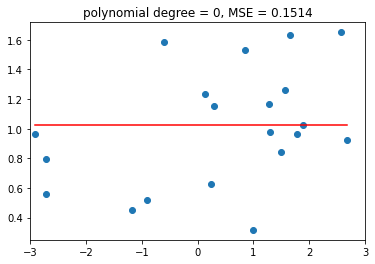

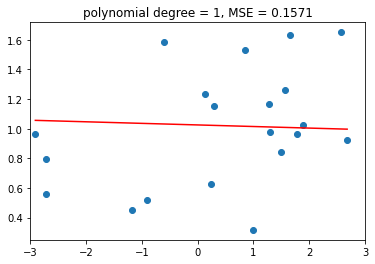

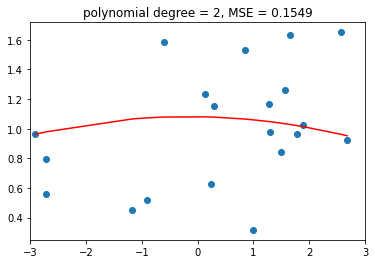

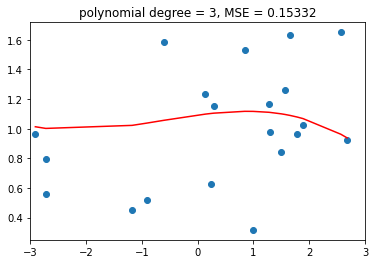

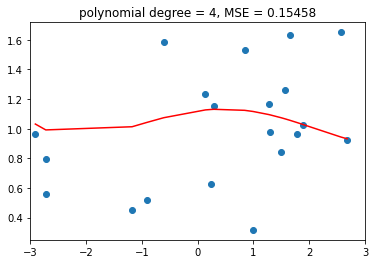

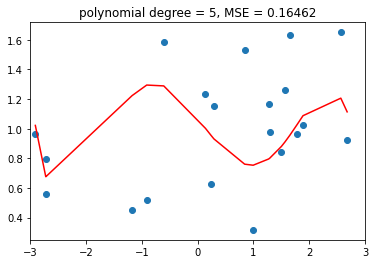

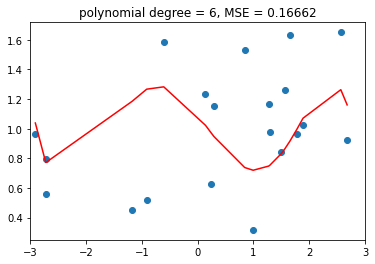

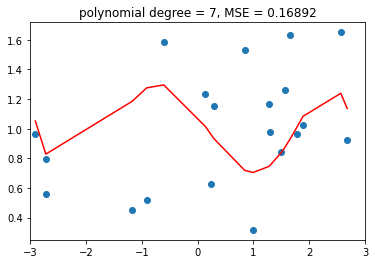

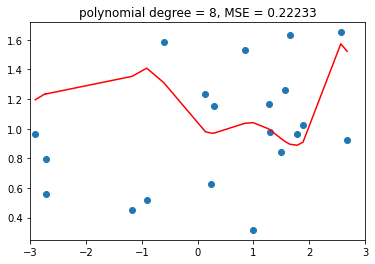

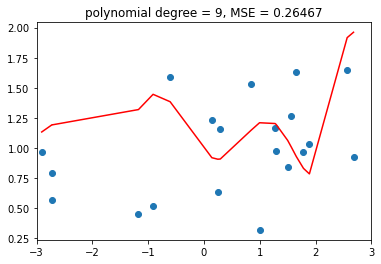

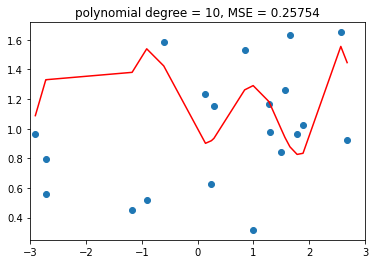

In [158]:
for k in range(1,12):
    plot(models[k-1], x_valid, y_valid)

plt.show()

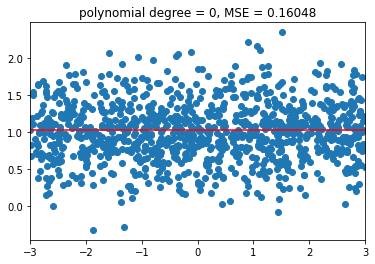

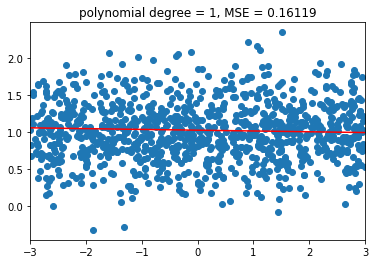

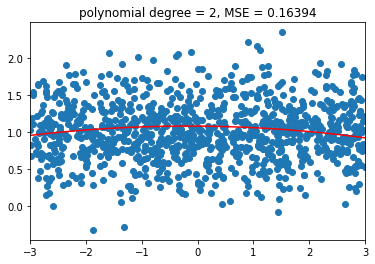

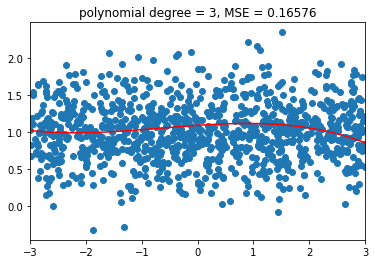

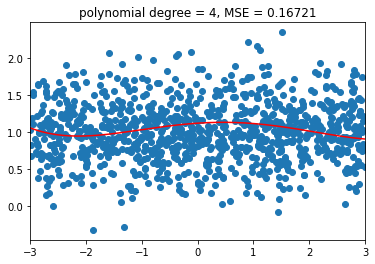

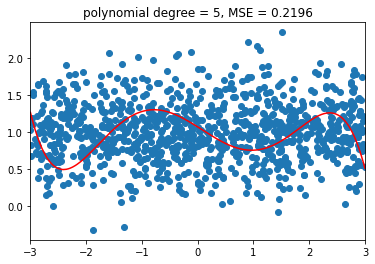

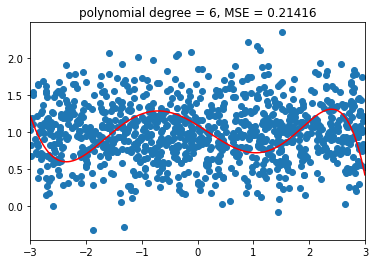

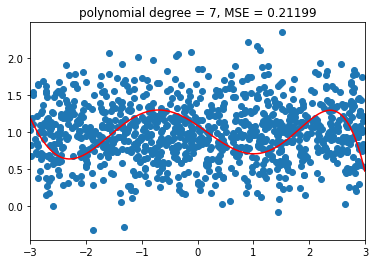

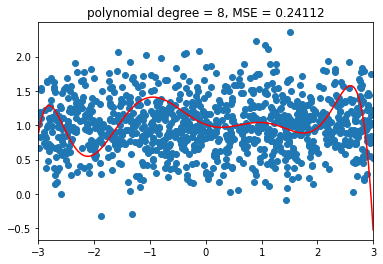

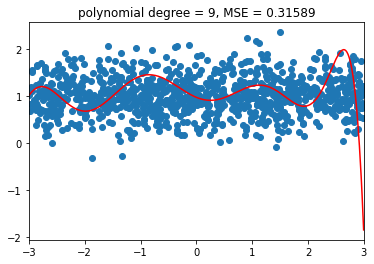

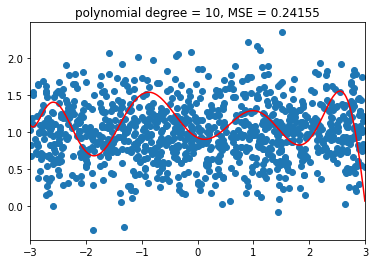

In [159]:
for k in range(1,12):
    plot(models[k-1], x_test, y_test)